In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve

In [2]:
dataset=pd.read_csv("HR_comma_sep.csv")
dataset

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


<AxesSubplot:>

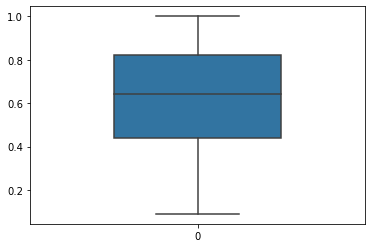

In [9]:
# dataset.satisfaction_level
sns.boxplot(data=dataset.satisfaction_level, width=0.5)

In [4]:
dataset.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
dataset.left.unique()    ## This shows that column "left" is the label column

array([1, 0], dtype=int64)

In [6]:
dataset.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

In [7]:
## Converting all the float type to int64
dataset[['satisfaction_level','last_evaluation']]=dataset[['satisfaction_level','last_evaluation']].astype(np.int64)

In [8]:
Y=dataset['left']
print(Y)

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64


In [9]:
## Let's drop Department and Salary as they are object type
X=dataset.drop(['left','Department','salary'], axis=1)
print(X)

       satisfaction_level  last_evaluation  number_project  \
0                       0                0               2   
1                       0                0               5   
2                       0                0               7   
3                       0                0               5   
4                       0                0               2   
...                   ...              ...             ...   
14994                   0                0               2   
14995                   0                0               2   
14996                   0                0               2   
14997                   0                0               6   
14998                   0                0               2   

       average_montly_hours  time_spend_company  Work_accident  \
0                       157                   3              0   
1                       262                   6              0   
2                       272                   4          

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=1)

## Now we will use different classification algortihms to predict the label for our dataset

### Logistic regression

In [11]:
from sklearn.linear_model import LogisticRegression
log_class=LogisticRegression()
log_class.fit(x_train,y_train)
y_predict=log_class.predict(x_test)
print("score = ",log_class.score(x_test,y_test))      ## Checking the accuracy of model with respect to test data

df_prediction=pd.DataFrame({'Actual':y_test, 'Predicted':y_predict})
print(df_prediction)
# plt.plot(y_predict, y_test)
# plt.show()

ytrain_pred = log_class.predict_proba(x_train)
print('Logistic train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = log_class.predict_proba(x_test)
print('Logistic test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

score =  0.7524444444444445
       Actual  Predicted
11908       0          0
10508       0          0
9193        0          0
13087       0          0
506         1          0
...       ...        ...
14728       1          0
10076       0          0
7718        0          0
4954        0          0
12170       1          0

[4500 rows x 2 columns]
Logistic train roc-auc: 0.7129948171831517
Logistic test roc-auc: 0.7233842855846592


#####  ytrain_pred will display the two columns, Since, we are using it for binary class claasification so it will give two columns, first column shows the probability of 0 class and second shows probability fo 1st class. ytrain_pred[:,1] means probability of getting 1 class. If we know 1 we can definelty know for 0 as well.

In [13]:
ytrain_pred

array([[0.77411063, 0.22588937],
       [0.92014283, 0.07985717],
       [0.79736886, 0.20263114],
       ...,
       [0.73851632, 0.26148368],
       [0.65316993, 0.34683007],
       [0.77094573, 0.22905427]])

### Random forest classifier

In [26]:
from sklearn.ensemble import RandomForestClassifier
rf_class=RandomForestClassifier()
rf_class.fit(x_train,y_train)
y_predict=rf_class.predict(x_test)
print("score = ",rf_class.score(x_test,y_test))      ## Checking the accuracy of model with respect to test data

df_prediction=pd.DataFrame({'Actual':y_test, 'Predicted':y_predict})
print(df_prediction)

y_train_pred=rf_class.predict_proba(x_train)
y_test_pred=rf_class.predict_proba(x_test)
print('Random forest test roc-auc: {}'.format(roc_auc_score(y_test, y_test_pred[:,1])))
print('Random forest train roc-auc: {}'.format(roc_auc_score(y_train, y_train_pred[:,1])))

score =  0.956
       Actual  Predicted
11908       0          0
10508       0          0
9193        0          0
13087       0          0
506         1          1
...       ...        ...
14728       1          1
10076       0          0
7718        0          0
4954        0          0
12170       1          1

[4500 rows x 2 columns]
Random forest test roc-auc: 0.9762212174961329
Random forest train roc-auc: 0.9970915661088183


### Adaboost classifier

In [30]:
from sklearn.ensemble import AdaBoostClassifier
adaboost_class=AdaBoostClassifier()
adaboost_class.fit(x_train,y_train)
y_predict=adaboost_class.predict(x_test)
print("score = ", adaboost_class.score(x_test,y_test))    ## Checking the accuracy of model with respect to test data

df_prediction=pd.DataFrame({"Actual":y_test, "predicted":y_predict})
print(df_prediction)

y_train_pred=adaboost_class.predict_proba(x_train)
y_test_pred=adaboost_class.predict_proba(x_test)
print('Random forest test roc-auc: {}'.format(roc_auc_score(y_test, y_test_pred[:,1])))
print('Random forest train roc-auc: {}'.format(roc_auc_score(y_train, y_train_pred[:,1])))

score =  0.9082222222222223
       Actual  predicted
11908       0          0
10508       0          0
9193        0          1
13087       0          0
506         1          0
...       ...        ...
14728       1          1
10076       0          0
7718        0          0
4954        0          0
12170       1          0

[4500 rows x 2 columns]
Random forest test roc-auc: 0.9534460958631835
Random forest train roc-auc: 0.9535992302258314


### KNN classifier

In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn_class=KNeighborsClassifier()
knn_class.fit(x_train,y_train)
y_predict=knn_class.predict(x_test)
print("score = ", knn_class.score(x_test,y_test))

df_prediction=pd.DataFrame({"Actual":y_test, "Predicted":y_predict})
print(df_prediction)

y_train_pred=knn_class.predict_proba(x_train)
y_test_pred=knn_class.predict_proba(x_test)
print('Random forest test roc-auc: {}'.format(roc_auc_score(y_test, y_test_pred[:,1])))
print('Random forest train roc-auc: {}'.format(roc_auc_score(y_train, y_train_pred[:,1])))

score =  0.9393333333333334
       Actual  Predicted
11908       0          0
10508       0          0
9193        0          1
13087       0          0
506         1          1
...       ...        ...
14728       1          1
10076       0          0
7718        0          0
4954        0          0
12170       1          1

[4500 rows x 2 columns]
Random forest test roc-auc: 0.9654654512733652
Random forest train roc-auc: 0.9899809262784554


### Now we will use the prediction probability of each of the models, combine them into a series and then take a final prediction with the mean of all the probabilites from each models. From that final prediction series we will extract the threshold values

In [33]:
pred=[]
for model in [log_class,rf_class,adaboost_class,knn_class]:
    pred.append(pd.Series(model.predict_proba(x_test)[:,1]))  # To combine the probability of all the models one by one for x_test
final_prediction=pd.concat(pred,axis=1).mean(axis=1)  ## To find out the mean of all the columns from pred series

print(f"Combined roc-auc: {roc_auc_score(y_test,final_prediction)}")

Combined roc-auc: 0.9772398664414045


In [36]:
pd.concat(pred, axis=1)   ## This is how our combine series of pred looks like

,0,1,2,3
0,0.462633,0.000000,0.328037,0.0
1,0.252688,0.000000,0.484759,0.0
2,0.200888,0.009783,0.500450,0.8
3,0.240279,0.000000,0.478291,0.0
4,0.348856,0.511500,0.497978,0.6
...,...,...,...,...
4495,0.275067,1.000000,0.809903,1.0
4496,0.256629,0.010000,0.495392,0.0
4497,0.254018,0.000000,0.475747,0.0
4498,0.218501,0.000000,0.478360,0.0


In [38]:
final_prediction    ## This is the mean of the all the columns probability

0       0.197667
1       0.184362
2       0.377780
3       0.179642
4       0.489583
          ...   
4495    0.771242
4496    0.190505
4497    0.182441
4498    0.174215
4499    0.489583
Length: 4500, dtype: float64

### Now from this final prediciton series, we will try to find out the threshold values using roc_curve

In [39]:
fpr,tpr,threshold=roc_curve(y_test,final_prediction)

In [42]:
threshold   

array([1.81964261, 0.81964261, 0.81215956, ..., 0.10549627, 0.10526777,
       0.0657116 ])

## Now let's try to find out which threshold value gives us most accuracy

In [45]:
from sklearn.metrics import accuracy_score
accuracy_ls=[]
for i in threshold:
    y_pred=np.where(final_prediction>i,1,0)
    accuracy_ls.append(accuracy_score(y_test,y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(threshold),pd.Series(accuracy_ls)], axis=1)
accuracy_ls.columns= ['Threshold value', 'Accuracy']
accuracy_ls

,Threshold value,Accuracy
0,1.819643,0.759111
1,0.819643,0.759111
2,0.812160,0.759778
3,0.811009,0.760444
4,0.803421,0.763556
...,...,...
1364,0.108418,0.252444
1365,0.107636,0.252222
1366,0.105496,0.251333
1367,0.105268,0.251111


In [48]:
## Now let's sort the accuracy
accuracy_ls.sort_values(by='Accuracy', ascending=False, inplace=True)
accuracy_ls.head(10)

,Threshold value,Accuracy
319,0.432067,0.955778
317,0.437151,0.955333
318,0.435621,0.955333
320,0.432008,0.955333
321,0.430044,0.955333
322,0.429593,0.955111
316,0.437637,0.955111
300,0.469450,0.954889
302,0.466871,0.954889
299,0.474441,0.954667


### So by seeing the above dataframe, we can say that 0.432 threshold value of the probability will give the best accuracy to our model.